<a href="https://colab.research.google.com/github/ellsafiorenza/ellsafiorenza.github.io/blob/main/finalproj_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project - Basketball Data

## Introduction

In this project, we choose to analyze the nba player basketball data. We want to address the following questions:

1. Which colleges produce the longest tenured NBA player? Which college produces the best rebounders, 3 point shooters, scorers, defenders? 
2. Can you predict how good a player will be based on their college statistics?

**Collaborator:**

1. Claudea Jennefer (3035156281, claudea@berkeley.edu)
2. Ellsa Fiorenza (3035079178, ellsafiorenza@berkeley.edu)

## Import Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn import linear_model as lm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble

## Read the Data

In [ ]:
official_bs = pd.read_csv("2012-18_officialBoxScore.csv")
player_bs = pd.read_csv("2012-18_playerBoxScore.csv")
standings = pd.read_csv("2012-18_standings.csv")
team_bs = pd.read_csv("2012-18_teamBoxScore.csv")
college = pd.read_csv("college.csv")

## Perform EDA

Let's show the head of all of our datasets (`official_bs`, `player_bs`, `standings`, `team_bs`, and `college`) to see the relation between each datasets to one another.

In [ ]:
official_bs.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


In [ ]:
player_bs.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1,0,1,CLE,East,Central,Home,Win,0


In [ ]:
standings.head()

,stDate,teamAbbr,rank,rankOrd,gameWon,gameLost,stk,stkType,stkTot,gameBack,...,rel%Indx,mov,srs,pw%,pyth%13.91,wpyth13.91,lpyth13.91,pyth%16.5,wpyth16.5,lpyth16.5
0,2012-10-30,ATL,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
1,2012-10-30,BKN,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
2,2012-10-30,BOS,14,14th,0,1,L1,loss,1,1.0,...,0.0,-13.0,-13.0,0.072,0.1687,13.8334,68.1666,0.131,10.742,71.258
3,2012-10-30,CHA,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000
4,2012-10-30,CHI,3,3rd,0,0,-,-,0,0.5,...,0.0,0.0,0.0,0.500,0.0000,0.0000,82.0000,0.000,0.000,82.000


In [ ]:
team_bs.head()

,gmDate,gmTime,seasTyp,offLNm1,offFNm1,offLNm2,offFNm2,offLNm3,offFNm3,teamAbbr,...,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,WAS,...,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Brothers,Tony,Smith,Michael,Workman,Haywoode,CLE,...,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
2,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,BOS,...,80.8333,126.3381,112.6515,13.6866,0.5244,19.8287,3.1250,100.0000,94.9832,94.9832
3,2012-10-30,20:00,Regular,McCutchen,Monty,Wright,Sean,Fitzgerald,Kane,MIA,...,62.7083,112.6515,126.3381,-13.6866,0.4643,18.8501,1.5000,25.0000,94.9832,94.9832
4,2012-10-30,22:30,Regular,Foster,Scott,Zielinski,Gary,Dalen,Eric,DAL,...,58.6458,99.3678,108.1034,-8.7356,0.5000,18.6567,1.7143,42.8571,91.5790,91.5790


In [ ]:
college.head()

,Unnamed: 0,active_from,active_to,birth_date,college,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240.0,...,0.0,NaN,5.6,0.599,3.3,0.728,2.5,1.8,134.0,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225.0,...,NaN,NaN,16.8,0.639,10.7,0.628,7.9,5.0,88.0,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162.0,...,2.7,NaN,21.9,0.474,10.4,0.863,6.4,5.5,64.0,29.0
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Only by looking at the datasets, we can see:
1. Some of the columns have missing values (from above we see that `college` dataset has missing values)
2. The `name` in `college` dataset is different compare to the `name` in other dataset
3. The dataset that contains information about players and college (we are most interested with in this project) are `player_bs` and `college`

Let's identify the other 4 dataset if they have missing values

Text(0.5, 1.0, 'Datasets (except College)')

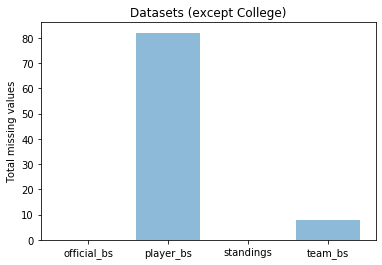

In [ ]:
objects = ('official_bs','player_bs','standings','team_bs')
y_pos = np.arange(len(objects))
performance = [official_bs.isna().values.sum(), 
          player_bs.isna().values.sum(), 
          standings.isna().values.sum(), 
          team_bs.isna().values.sum()]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Total missing values')
plt.title('Datasets (except College)')

From the plot above, we see that `player_bs` and `team_bs` have missing values too. Therefore, the datasets that have missing values are `player_bs`, `team_bs` and `college`.

Since, we will mostly be working with `player_bs` and `college` in this project, let's see the correlation of the quantiative features in each dataset.

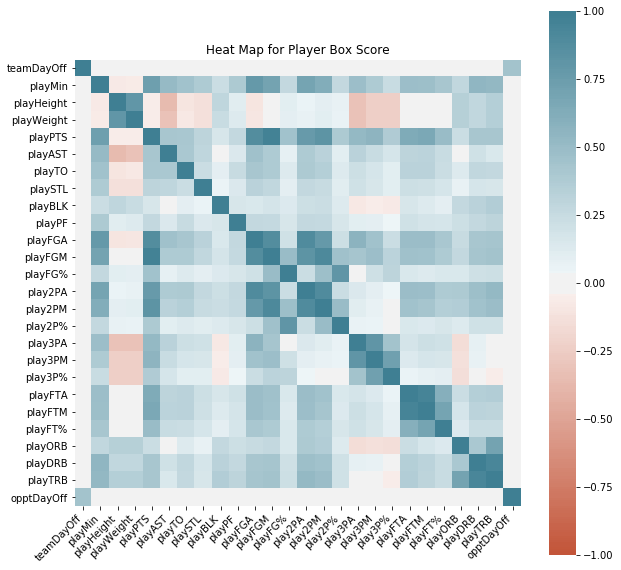

In [ ]:
player_num =player_bs.select_dtypes(include = [int,float])
corr = player_num.corr()

# Plot the correlation of all features using heatmap
ax = plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Heat Map for Player Box Score')
plt.show();

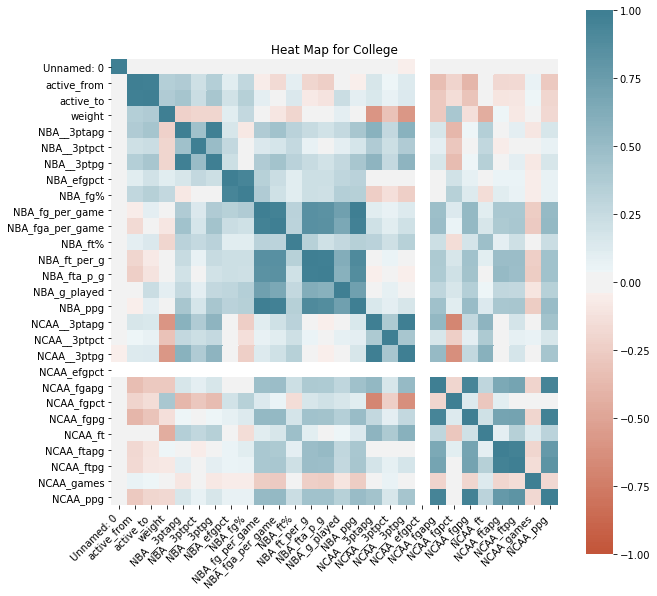

In [ ]:
player_num =college.select_dtypes(include = [int,float])
corr = player_num.corr()

# Plot the correlation of all features using heatmap
ax = plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.title('Heat Map for College')
plt.show();

## Data Cleaning

### Step 1: Dealing with NaN

`player_bs`, `team_bs` and `college` dataframe has empty values, 
let's examine which columns are empty and fill out the empty values with appropriate options:

In [ ]:
nan_in_player_bs = player_bs.columns[player_bs.isna().sum().values != 0]
nan_in_team_bs = team_bs.columns[team_bs.isna().sum().values != 0]
nan_in_college = college.columns[college.isna().sum().values != 0]
print(nan_in_player_bs)
print(nan_in_team_bs)
print(nan_in_college)

Index(['offLNm3', 'offFNm3'], dtype='object')
Index(['offLNm3', 'offFNm3'], dtype='object')
Index(['birth_date', 'college', 'height', 'position', 'weight', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_ft%',
       'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg', 'NCAA_efgpct',
       'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft', 'NCAA_ftapg',
       'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')


Now, let's see the type of empty data using `dtypes`.

In [ ]:
player_bs[nan_in_player_bs].dtypes

offLNm3    object
offFNm3    object
dtype: object

In [ ]:
team_bs[nan_in_team_bs].dtypes

offLNm3    object
offFNm3    object
dtype: object

In [ ]:
college[nan_in_college].dtypes

birth_date       object
college          object
height           object
position         object
weight          float64
NBA__3ptapg     float64
NBA__3ptpct     float64
NBA__3ptpg      float64
NBA_efgpct      float64
NBA_fg%         float64
NBA_ft%         float64
NCAA__3ptapg    float64
NCAA__3ptpct    float64
NCAA__3ptpg     float64
NCAA_efgpct     float64
NCAA_fgapg      float64
NCAA_fgpct      float64
NCAA_fgpg       float64
NCAA_ft         float64
NCAA_ftapg      float64
NCAA_ftpg       float64
NCAA_games      float64
NCAA_ppg        float64
dtype: object

Some of the empty columns are `character` (or `string`), which in this case it would be better to just leave it empty. Let's deal with empty values that are quantitative!

In [ ]:
nan_in_college_number = college[nan_in_college].select_dtypes(include = [int,float]).columns
nan_in_college_number

Index(['weight', 'NBA__3ptapg', 'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct',
       'NBA_fg%', 'NBA_ft%', 'NCAA__3ptapg', 'NCAA__3ptpct', 'NCAA__3ptpg',
       'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg', 'NCAA_ft',
       'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg'],
      dtype='object')

We will fill in all of the `NaN` values that are `float` or `int` with the average

In [ ]:
college[nan_in_college_number] = college[nan_in_college_number].fillna(np.mean)
college.isna().sum()

Unnamed: 0            0
active_from           0
active_to             0
birth_date           29
college             302
height                1
name                  0
position              1
url                   0
weight                0
NBA__3ptapg           0
NBA__3ptpct           0
NBA__3ptpg            0
NBA_efgpct            0
NBA_fg%               0
NBA_fg_per_game       0
NBA_fga_per_game      0
NBA_ft%               0
NBA_ft_per_g          0
NBA_fta_p_g           0
NBA_g_played          0
NBA_ppg               0
NCAA__3ptapg          0
NCAA__3ptpct          0
NCAA__3ptpg           0
NCAA_efgpct           0
NCAA_fgapg            0
NCAA_fgpct            0
NCAA_fgpg             0
NCAA_ft               0
NCAA_ftapg            0
NCAA_ftpg             0
NCAA_games            0
NCAA_ppg              0
dtype: int64

### Step 2: Match the Name column format for Player Box Score and College DataFrame

To combine `college` dataframe and `player_bs` dataframe, we need to match the format of the player's `name`:

In [ ]:
player_bs['name'] = player_bs['playFNm'] + ' ' + player_bs['playLNm']

In [ ]:
player_bs['name']

0             A.J. Price
1           Trevor Ariza
2           Emeka Okafor
3           Bradley Beal
4          Trevor Booker
               ...      
155708    JaKarr Sampson
155709     Chavano Hield
155710       Nigel Hayes
155711    Vincent Carter
155712       Jack Cooley
Name: name, Length: 155713, dtype: object

Rename `college` column into `college_name` in `college` data frame.

In [ ]:
college = college.rename(columns = {'college' : 'college_name'})
college.head()

,Unnamed: 0,active_from,active_to,birth_date,college_name,height,name,position,url,weight,...,NCAA__3ptpg,NCAA_efgpct,NCAA_fgapg,NCAA_fgpct,NCAA_fgpg,NCAA_ft,NCAA_ftapg,NCAA_ftpg,NCAA_games,NCAA_ppg
0,0,1991,1995,"June 24, 1968",Duke University,6-10,Alaa Abdelnaby,F-C,/players/a/abdelal01.html,240,...,0,<function mean at 0x7f99eb107e60>,5.6,0.599,3.3,0.728,2.5,1.8,134,8.5
1,1,1969,1978,"April 7, 1946",Iowa State University,6-9,Zaid Abdul-Aziz,C-F,/players/a/abdulza01.html,235,...,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>
2,2,1970,1989,"April 16, 1947","University of California, Los Angeles",7-2,Kareem Abdul-Jabbar,C,/players/a/abdulka01.html,225,...,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,16.8,0.639,10.7,0.628,7.9,5,88,26.4
3,3,1991,2001,"March 9, 1969",Louisiana State University,6-1,Mahmoud Abdul-Rauf,G,/players/a/abdulma02.html,162,...,2.7,<function mean at 0x7f99eb107e60>,21.9,0.474,10.4,0.863,6.4,5.5,64,29
4,4,1998,2003,"November 3, 1974","University of Michigan, San Jose State University",6-6,Tariq Abdul-Wahad,F,/players/a/abdulta01.html,223,...,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>,<function mean at 0x7f99eb107e60>


In [ ]:
college_player = college.merge(player_bs, on = 'name')

## Analyze & Visualize  the Data


## Question 1: Finding colleges that produce the longest tenured NBA player and college that produces the best rebounders, 3 point shooters, scorers, defenders

Drop all row with empty `college_name` and store it in a new dataframe called `no_empty_name`.

In [ ]:
no_empty_name = college_player[college_player['college_name'].notna()]

Finding the top 10 college that produce the most player into nba from `no_empty_name` dataframe.

In [ ]:
most_college = college.groupby('college_name').size().sort_values(ascending = False)
top_10_college = most_college.head(10)
top_10_college

college_name
University of Kentucky                   96
University of California, Los Angeles    87
University of North Carolina             87
University of Kansas                     67
Duke University                          67
Indiana University                       60
University of Notre Dame                 54
University of Louisville                 53
University of Michigan                   49
St. John's University                    47
dtype: int64

Text(0.5, 1.0, 'Top 10 Colleges for Most NBA Players')

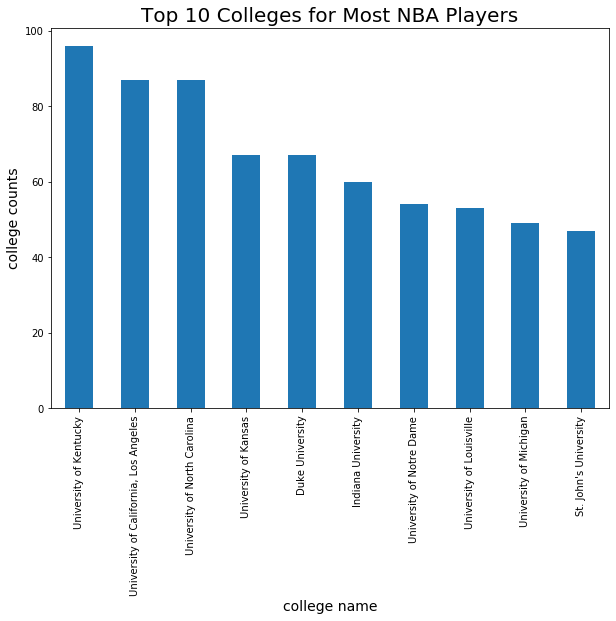

In [ ]:
plt.figure(figsize = (10, 7))
top_10_college.plot(kind = 'bar')
plt.ylabel('college counts', fontsize = 14)
plt.xlabel('college name', fontsize = 14)
plt.title('Top 10 Colleges for Most NBA Players', fontsize = 20)

Creating a new column called `active_year` from `active_to` and `active_from`.

In [ ]:
copy_college = college
copy_college['active_year'] = copy_college['active_to'] - copy_college['active_from']

Finding the longest active NBA player by creating a new column called `active_year` from subtracting `active_to` by `active_from`. Then, prints out the `name`, `active_year`, and `college_name` of the longest active NBA player found.

In [ ]:
longest_active_year = max(copy_college['active_year'])
player_index = copy_college[copy_college['active_year'] == longest_active_year].index

name = copy_college.loc[player_index, 'name'].values
college_name = copy_college.loc[player_index, 'college_name'].values
years = copy_college.loc[player_index, 'active_year'].values

print("The longest active NBA player: " + name[0] + " with " + str(years[0]) + " years.")
print("The longest active NBA player's school: " + college_name[0])

The longest active NBA player: Kevin Willis with 22 years.
The longest active NBA player's school: Michigan State University


Define `threepos` function to group the `position` into 3 categories `C`, `F`, and `G`.

In [ ]:
def threepos(data, column):
    return data[column].str.split('-', expand = True)[0]

Using the `threepos` function, make the `position` column in `college` dataframe into 3 categories only.

In [ ]:
college['position'] = threepos(college, 'position')

Checking the `position` column has only `C`, `F`, and `G`.

In [ ]:
college.groupby('position').size()

position
C     723
F    1904
G    1948
dtype: int64

Finding the college that produces `best_rebounder` from `no_empty_name`. Print out the `name` of the player, the `college_name`, and the `best_total_rebounder`.

In [ ]:
best_total_rebounder = max(no_empty_name['playTRB'].to_numpy())
best_rebounder = no_empty_name[no_empty_name['playTRB'] == best_total_rebounder]

print('Best rebounder is {0} from {1} with total {2} rebounds.'.format(
    best_rebounder['name'].to_numpy()[0], 
    best_rebounder['college_name'].to_numpy()[0], 
    best_total_rebounder
))

Best rebounder is Andre Drummond from University of Connecticut with total 29 rebounds.


Finding the college that have the most count of `100%` rate for 3 points shoot from `no_empty_name`.

In [ ]:
best_3ptpct = no_empty_name[no_empty_name['play3P%'] == 1].groupby('college_name').size().idxmax()
print('Best school with high counts of 100% rate for 3 points shoot: {0}'.format(best_3ptpct))

Best school with high counts of 100% rate for 3 points shoot: University of Kentucky


Finding the college that produces the `best_scorer` from `no_empty_name`. Print out the `name` of the player, the `college_name`, and the `best_score`.

In [ ]:
best_score = max(no_empty_name['playPTS'].to_numpy())
best_scorer = no_empty_name[no_empty_name['playPTS'] == best_score]
print('Best scorer is {0} from {1} with total {2} points made.'.format(
    best_scorer['name'].to_numpy()[0], 
    best_scorer['college_name'].to_numpy()[0], 
    best_score
))

Best scorer is Devin Booker from University of Kentucky with total 70 points made.


Finding the college that produce the `best_defender`.

In [ ]:
best_defensive_rebound = max(no_empty_name['playDRB'].to_numpy())
best_defender = no_empty_name[no_empty_name['playDRB'] == best_defensive_rebound]
print('Best defender is {0} from {1} with total {2} defensive rebounds made.'.format(
    best_defender['name'].to_numpy()[0], 
    best_defender['college_name'].to_numpy()[0], 
    best_defensive_rebound
))

Best defender is Kevin Love from University of California, Los Angeles with total 21 defensive rebounds made.


## Question 2: Predicting how good a player will be based on their college statistics

### Step1: Pick features for Overall Performance Quality of NBA Player

After doing online research, we learn that from `player_bs` there are many features that are associate with a **good player**, below we listed some of the features that we believe are positively related with **good player**.
**Good NBA** player are commonly associated with **High**:
1. Points Scored (playPTS)
2. Assist (playAST)
3. Turnovers (playTO)
4. Steals (playSTL)
5. Blocks (playBLK)
6. Field goal percentage (playFG%)
7. Two point percentage (play2P%)
8. Three point percentage (play3P%)
9. Free throw percentage (playFT%)
10. Total rebounds (playTRB)

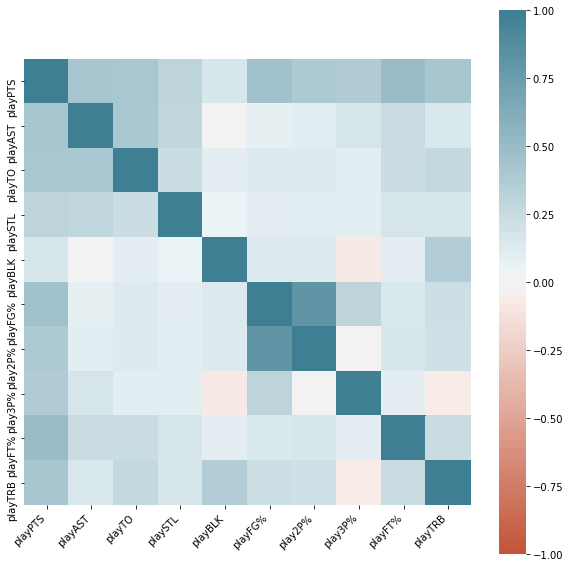

In [ ]:
player_features = player_bs[['playPTS', 'playAST', 'playTO', 'playSTL', 'playBLK', 
                             'playFG%', 'play2P%', 'play3P%', 'playFT%', 'playTRB']]

corr = player_features.corr()

# Plot the correlation of all features using heatmap
ax = plt.figure(figsize=(10,10))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

plt.show();

From the heat map, we can see that (`play2P%`, `playBLK`) (pair 1) has a negative correlation and (`play3P%`, `playTRB`) (pair 2) also has a negative correlation, therefore, we will only choose one from each pair to be included in the `player_features`.

In [ ]:
player_features = player_features.drop(columns = ['play2P%','play3P%'])

### Step 2: Use The First Principal Component for Representing the Performance Level (Rank 1 Approximation of Performance Level)

From above, we saw that there 10 features in which associated with the performance quality of a player, however we need a way to approximate these 10 features in 1 dimension. Thus, we decide to do rank 1 approximation using `PCA`.

First, we need to standardize the feature:

In [ ]:
def standardize(df):
    return (df - np.mean(df, axis = 0))/ np.std(df, axis = 0)

In [ ]:
normal_player_features = standardize(player_features)
normal_player_features.head()

,playPTS,playAST,playTO,playSTL,playBLK,playFG%,playFT%,playTRB
0,-0.342607,1.567200,-0.219102,-0.748016,-0.539087,-1.073990,1.333110,-0.597986
1,-0.088358,0.758966,-0.938005,2.306473,1.800196,-0.180277,0.169307,-0.312010
2,0.038767,-0.857503,-0.219102,-0.748016,4.139479,-0.079270,0.169307,0.831896
3,-0.215482,0.354848,0.499802,0.270147,-0.539087,-0.685314,1.333110,-0.312010
4,-0.723981,-0.453386,1.937608,0.270147,0.630555,-0.797634,-0.994496,-0.883963


In [ ]:
u, s, vt = np.linalg.svd(normal_player_features, full_matrices = False)
P = normal_player_features @ vt.T
PC = P.iloc[:,:1].rename(columns = {0 : 'pc1'})

Set `PC1` as the overall performance level of the player:

In [ ]:
player_bs['performance'] = PC['pc1']

Now, let's see how good our approximation compare to points scored:

In [ ]:
# rank 1 approximation of our normal_player_features
rank_1_appx = pd.DataFrame(u[:, 0:1] @ np.diag(s[0:1]) @ vt[0:1, :], columns = normal_player_features.columns)

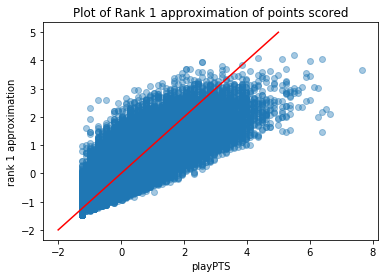

In [ ]:
normal_player_features_rank_1 = pd.DataFrame(u[:, 0:1] @ np.diag(s[0:1]) @ vt[0:1, :], columns = normal_player_features.columns)
plt.scatter(normal_player_features['playPTS'].values,normal_player_features_rank_1['playPTS'], alpha = 0.4)
x = np.arange(-2,6,1)
plt.plot(x, x, color = 'red')
plt.xlabel('playPTS')
plt.ylabel('rank 1 approximation')
plt.title('Plot of Rank 1 approximation of points scored');

From the plot above, we can see that our approximation is somewhat fair.

### Step 3: Combine Performance Level with College statistics


In [ ]:
# College performance level
performance = player_bs[['name','performance']]

college_player = college.merge(performance, on = 'name')
college_player.columns

Index(['Unnamed: 0', 'active_from', 'active_to', 'birth_date', 'college_name',
       'height', 'name', 'position', 'url', 'weight', 'NBA__3ptapg',
       'NBA__3ptpct', 'NBA__3ptpg', 'NBA_efgpct', 'NBA_fg%', 'NBA_fg_per_game',
       'NBA_fga_per_game', 'NBA_ft%', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg', 'NCAA__3ptapg', 'NCAA__3ptpct',
       'NCAA__3ptpg', 'NCAA_efgpct', 'NCAA_fgapg', 'NCAA_fgpct', 'NCAA_fgpg',
       'NCAA_ft', 'NCAA_ftapg', 'NCAA_ftpg', 'NCAA_games', 'NCAA_ppg',
       'active_year', 'performance'],
      dtype='object')

### Step 4: Building a Model using Linear Regression

In [ ]:
# define some functions:

def rmse(y, y_hat):
    return np.sqrt(np.mean((y-y_hat)**2))

def cut_down_features(df, limit):
    df1 = pd.DataFrame(df)
    corr = df1.corr()
    for col in corr.columns:
        corr_withoutself = corr[col].drop(labels = [col])
        if any(corr_withoutself < -limit) or any(corr_withoutself > limit):
            df1 = df1.drop(columns = [col])
            corr = df1.corr()
            
    return df1

Since our performance level is a quantitative values, we can use either Linear Regression or Random Forest model to predict the performance level based on college statistics. First, we will use `Linear Regression` model.

#### Step 4.1: Split Training and Testing set:

In [ ]:
train, test = train_test_split(college_player, test_size = 0.1, random_state = 42)

#### Step 4.2: Building Transformation Function:

Make the transformation function called `Phi`:

In [ ]:
def Phi(data):
    '''Transformation Function'''
    
    # reset index
    data1 = pd.DataFrame(data)

    # get all int and floats from data
    numbers = data1.select_dtypes(include = [int,float])

    # drop unnamed columns
    numbers = numbers.loc[:, ~numbers.columns.str.contains('^Unnamed')]

    # drop active_from and active_to
    numbers = numbers.drop(columns = ['active_from', 'active_to'])

    # find how long the player was active
    length = data1.loc[:,'active_to'] - data1.loc[:, 'active_from']

    # find the age when player started
    birth_year = data1['birth_date'].str.split(",", expand = True)[1]
    birth_year = birth_year.astype(int).fillna(0)
    starting_age = data1.loc[:,'active_from'] - birth_year

    # find the height of the player in inch
    height = data1['height'].str.split("-", expand = True)
    inch = height.loc[:,0].astype(int) * 12 + height.loc[:,1].astype(int)

    # one-hot-encode the position
    dummies = pd.get_dummies(data1['position'])
    
    # drop the last dummies to avoid multicollinearity
    dummies = dummies.drop(columns = [dummies.columns[len(dummies.columns)-1]])

    X = pd.concat([length, starting_age, inch, numbers, dummies], axis = 1)
    X.rename(columns= {0:'length',1:'starting_age',2:'inch'}, inplace = True)
    
    # standardize the features
    X = standardize(X)
    return X

#### Step 4.3: Picking the Features:
We want to use features that have a strong relationship with Y. Thus, define a function called `features` that takes in `data` and return a list of `features` that have a high `correlation`. 

In [ ]:
def features(data):
    # combine X and Y as one data
    X = Phi(data.drop(columns = ['performance']))
    Y = data['performance']
    data = pd.concat([X,Y], axis = 1)

    # Look at the correlation of X with Y and take features with high correlation
    corr = data.corr()
    features = corr[corr['performance'].values > 0.2].index

    # Excluding Y from feature lists
    features = features.drop('performance')
    return features

Define a new transformation function called `Phi_features` that takes in `data` and a list of `features`. The function will drop column `performance` for X and set X with the list of of `features` given. Also, set the Y with a series from `performance` column.


In [ ]:
def Phi_Features(data, features):
    X = Phi(data.drop(columns = ['performance']))
    X = X[features]
    Y = data['performance']
    return X,Y

Only take `features` that have a significant relationship with `Y_train`.

In [ ]:
picked_features = features(train)
X_train, Y_train = Phi_Features(train, picked_features)
X_train.columns

Index(['NBA_fg_per_game', 'NBA_fga_per_game', 'NBA_ft_per_g', 'NBA_fta_p_g',
       'NBA_g_played', 'NBA_ppg'],
      dtype='object')

#### Step 4.3: Build the Model:
Using features from above, let's build a linear regression model

In [ ]:
X_train
Y_train = train['performance']

Make a linear model with `scikit learn`:

In [ ]:
model = LinearRegression(fit_intercept=True)

Fit the model with training data:

In [ ]:
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
training_rmse = rmse(Y_train, Y_pred)
training_rmse

1.3474805533816034

We got `training rmse` = 1.34748. 

#### Step 4.4: Residual Plot

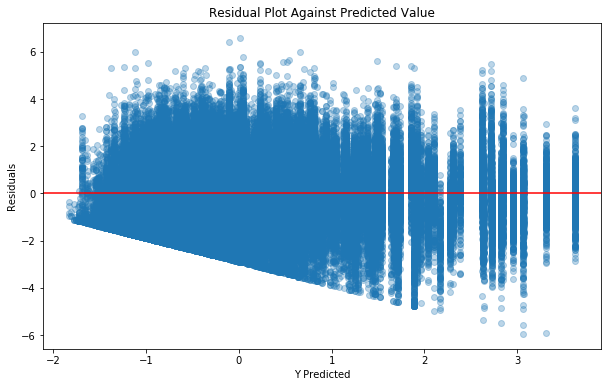

In [ ]:
residuals = Y_train - Y_pred
plt.figure(figsize=(10,6))
plt.scatter(Y_pred, residuals, alpha=0.3)
plt.axhline(y=0, color ='red')
plt.xlabel("Y Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot Against Predicted Value")
plt.show();

From the residual plot above, we can see that the residuals are not equally and randomly spaced throughout the Y predicted values. This might be because our features does not have a linear relationship with Y. Therefore, we will examine the relationship between our features and Y.

#### Step 4.5: Examining the relationship between X and Y

In [ ]:
# How many features do we have?
X_train.columns.shape[0]

6

In total we have 6 features, let's examine which of them has non-linear relationship with Y

In [ ]:
data = pd.concat([X_train,Y_train], axis = 1)

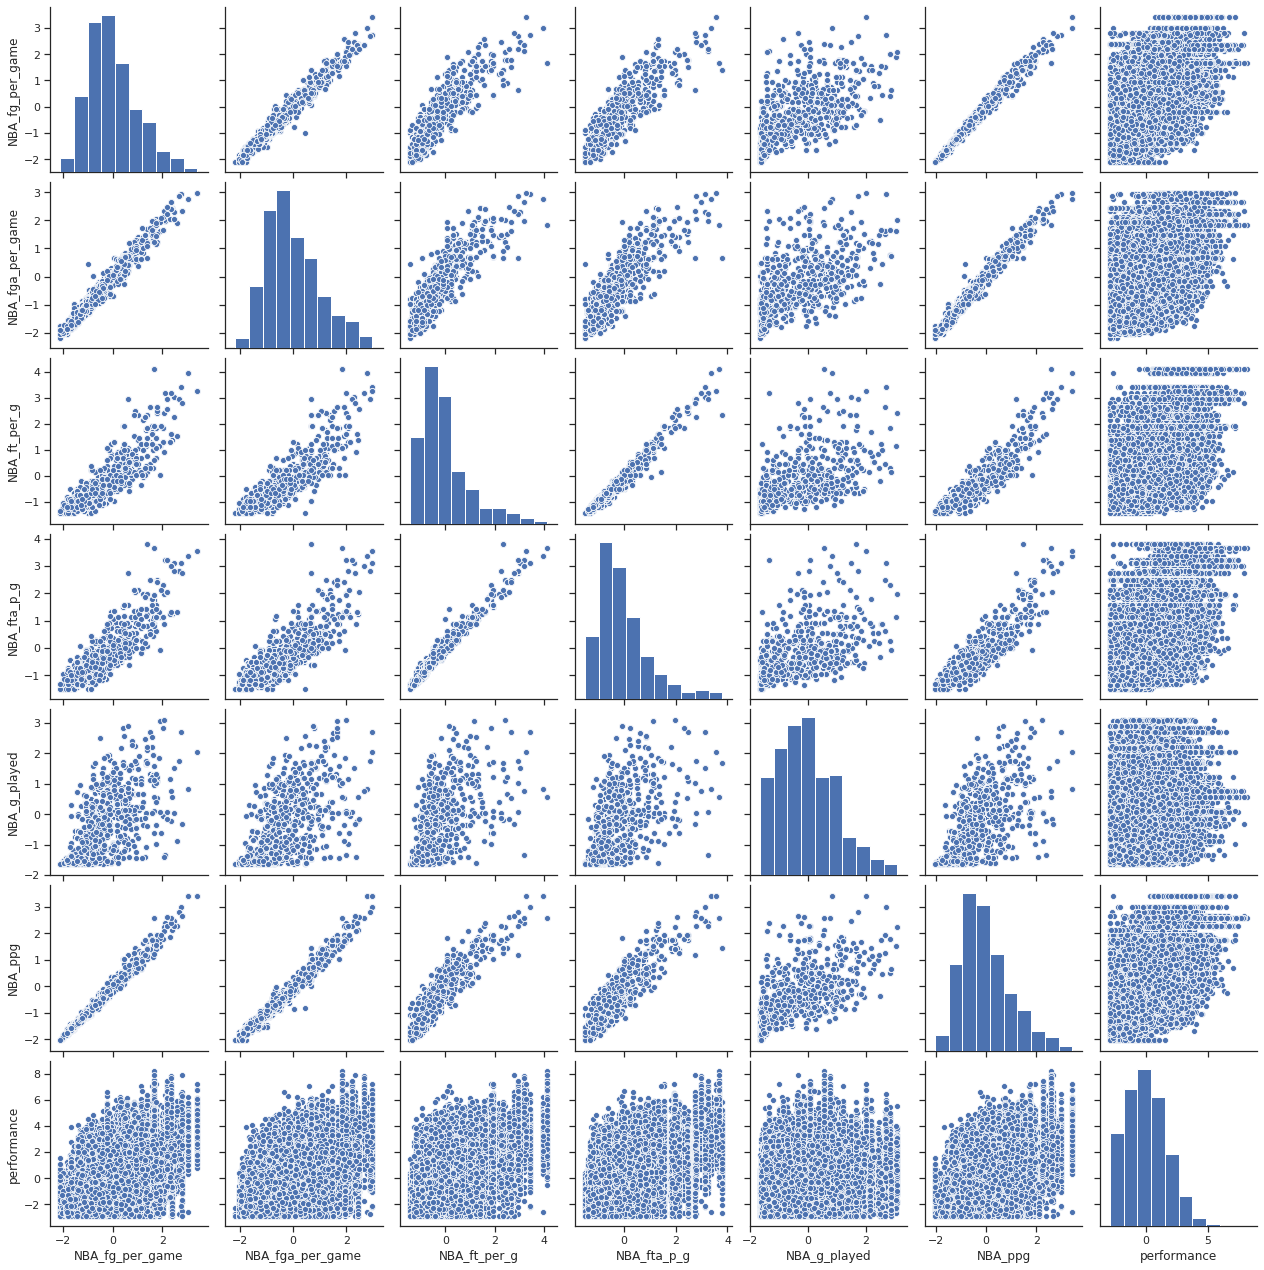

In [ ]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data)

From the pairplot above we can see that our Y value does not have a strong relationship to any of the features. Thus, this is probably the main cause for the residual plot to not be random and equal throughout predicted value. Moreover, we also notices that the distribution of X and Y are skewed right and some of the X features are highly correlated with each other. Meanwhile, two of the Linear Regression assumptions are X and Y normally distributed and the features are independent. 

First, we will `normalize` our data with `Min-Max Normalization` and `square-root` transformation.

In [ ]:
def normalize(column):
    '''Min-Max Normalization'''
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

First use `Min-Max Normalization`:

In [ ]:
data = data.apply(normalize)

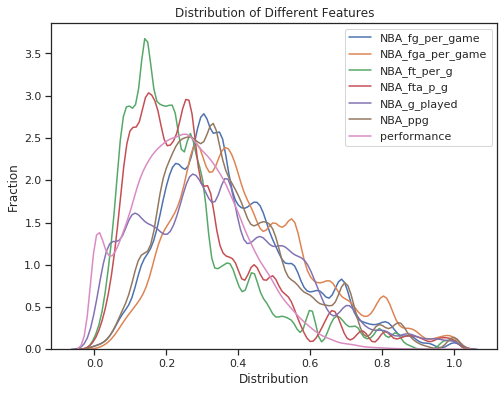

In [ ]:
fig = plt.figure(figsize = (8,6))
for col in data.columns:
    sns.distplot(data[col], hist = False, label = col)
plt.xlabel('Distribution')
plt.ylabel('Fraction')
plt.title('Distribution of Different Features')
plt.legend(loc = 1);

Our data still looks soewhat skewed right, so we will apply `square root` transformation:

In [ ]:
data = data.apply(np.sqrt)

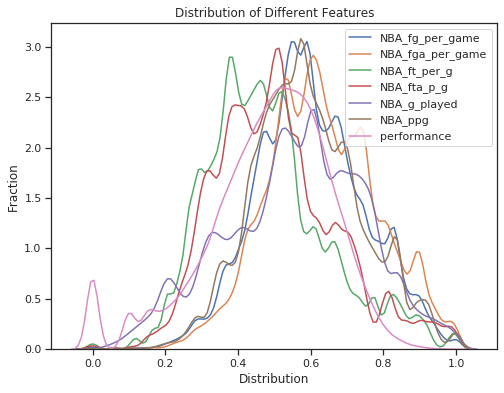

In [ ]:
fig = plt.figure(figsize = (8,6))
for col in data.columns:
    sns.distplot(data[col], hist = False, label = col)
plt.xlabel('Distribution')
plt.ylabel('Fraction')
plt.title('Distribution of Different Features')
plt.legend(loc = 1);

Now, we can see that our data roughly looks normal! Now, let's only take features with `correlation` between `-0.8 to 0.8`.

In [ ]:
X_train, Y_train = data.drop(columns = ['performance']), data['performance']
X_train = cut_down_features(X_train, 0.8)

Let's re-fit our data and re-calculate the training rmse!

In [ ]:
X_train, Y_train = data.drop(columns = ['performance']), data['performance']
model.fit(X_train, Y_train)
Y_pred = model.predict(X_train)
training_rmse = rmse(Y_train, Y_pred)
training_rmse

0.14195893296880344

We can see a huge improvement from before normalization to after normalization (rmse from 1.34 to 0.14)

#### Step 4.6: Cross Validate:

Make the `cross_validate_rmse` function, import `KFold` from `sklearn.model_selection` and `clone` from `sklearn.base`:

In [ ]:
from sklearn.model_selection import KFold
from sklearn.base import clone

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits = 5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

Cross validation value for our training set:

In [ ]:
cross_validate_rmse(model,X_train,Y_train)

0.14196584816471533

We can see that the cross-validation rmse is pretty low, therefore our model is less likely to overfit.

#### Step 4.7: Update the Transformation Function

After adding the normalization function, we need to update our transformation function

In [ ]:
def Updated_Phi(data, features):
    X, Y = Phi_Features(data, features)
    data1 = pd.concat([X_train,Y_train], axis = 1)
    data1 = data1.apply(normalize)
    data1 = data1.apply(np.sqrt)
    X, Y = data1.drop(columns = ['performance']), data1['performance']
    return X, Y

#### Step 4.8: Check Testing RMSE

Our cross validation rmse does not seems to far compare to our training rmse, thus is means we did not overfit our data. Now, let's check out testing rmse

In [ ]:
X_test, Y_test = Updated_Phi(test, picked_features)
Y_test_pred = model.predict(X_test)
testing_rmse = rmse(Y_test, Y_test_pred)
testing_rmse

0.16582257317894902

From calculation above, see that the testing rmse is not far from the training and cross validation rmse. Moreover, the rmse are pretty low (less than 0.2). Therefore, we our model does not overfit the data.

### Step 5: Building a Model using Random Forest

#### Step 5.1 : Tranforming the Data set
Define a transformation function `process_data` to round performance values

In [ ]:
def process_data(data, column, features):
    X, y = Updated_Phi(data, features)
    y = y.round(0)
    return X, y

Use the tranformation function `process_data` to transform the `train` data and set `X_train` and `y_train`.

In [ ]:
X_train, y_train = process_data(train, 'performance', picked_features)

Use the tranformation function `process_data` to transform the `test` data and set `X_test` and `y_test`.

In [ ]:
X_test, y_test = process_data(test, 'performance', picked_features)

#### Step 5.2: Build the Random Forest Model:

Create the `random_forest_model` with `n_estimator = 20` and `random_state = 42`. 

In [ ]:
random_forest_model = ensemble.RandomForestClassifier(n_estimators = 20, random_state = 42)

In [ ]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Now, let's check the training accuracy

In [ ]:
rf_train_accuracy = random_forest_model.score(X_train, y_train)
rf_train_accuracy

0.9089157140279805

In [ ]:
y_train_pred = random_forest_model.predict(X_train)
rf_train_rmse = rmse(y_train_pred, y_train)

rf_train_rmse

0.301801732884388

We got around 90.9% accuracy which is pretty high and we also got rmse around 0.305 (moderately higher than linear regression, perhaps due to rounding that we performed in the beginning). Now, let's do cross validation!

#### Step 5.3: Cross Validate & Check the Testing Accuracy

In [ ]:
def cross_validate_accuracy(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits = 5)
    accuracy_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        accuracy_values.append(model.score(X.iloc[va_ind,:], y.iloc[va_ind]))
    return np.mean(accuracy_values)

In [ ]:
rf_cross_validate_accuracy = cross_validate_accuracy(random_forest_model, X_train, y_train)
rf_cross_validate_accuracy

0.9070460029003549

In [ ]:
rf_cross_validate_rmse = cross_validate_rmse(random_forest_model, X_train, y_train)
rf_cross_validate_rmse

0.30486013180529264

We got around 90.7% cross validate accuracy and around 0.305 which is similar to the accuracy and rmse for training set.

In [ ]:
rf_test_accuracy = random_forest_model.score(X_test, y_test)
rf_test_accuracy

0.9060782995194436

In [ ]:
y_test_pred = random_forest_model.predict(X_test)
rf_test_rmse = rmse(y_test_pred, y_test)
rf_test_rmse

0.3064664752963305

We got around 90.6% cross validate accuracy and around 0.306 which is similar to the accuracy and rmse from training and cross validation. Thus, we conclude that our random forest is not overfitting.

## Conclusion

**Question 1: Which college produces the longest tenured NBA player? Which college produces the best rebounder, 3-points shooter, scorer, and defender?**

From our analysis above, we found:
1. The longest tenured NBA player is Kevin Willis who played for 22 years from Michigan State University.
2. The best rebounder is Andre Drummond from University of Connecticut with total 29 rebounds.
3. The best college for 3-points shooter with a high 3-points shoot percentage is University of Kentucky.
4. The best scorer is Devin Booker from University of Kentucky with total 70 points made.
5. The best defender is Kevin Love from University of California, Los Angeles with 21 defensive rebounds.

We also get the top 10 college that produces the most NBA player, that is:
1. University of Kentucky, with 96 players.
2. University of California, Los Angeles, with 87 players.
3. University of North Carolina, with 87 players.
4. University of Kansas, with 67 players.
5. Duke University, with 67 players.
6. Indiana University, with 60 players.
7. University of Notre Dame, with 54 players.
8. University of Louisville, with 53 players.
9. University of Michigan, with 49 players.
10. St. John's University, with 47 players.

**Question 2: Can we predict how good a player will be based on their college statistics**

Answer: 

Yes, we can. From our analysis, we have built two different models to predict the quality of a player (rank 1 approximation from NBA player data) from their college statistics. The first one with **Linear Regression** and the other one with **Random Forest**. From our analysis, we show that after applying transformation to our data (picking the features, standardize, and normalization), the **Linear Regression** model produces low and stable rmse in training, cross validation (cv), and testing set (around 0.15) and the **Random Forest** model produces above 90% accuracy (in training, cv, and testing set) as well as approximately 0.3 rmse (in training, cv, and testing set). Therefore, we conclude that using **Linear Regression** and/or **Random Forest** models would be reasonable in predicting how good a player will be based on their transformed college statistics.

